<a href="https://colab.research.google.com/github/PolMix/nems_ai/blob/main/Mesh_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lib import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d  
from matplotlib import cm

# Исследование оптимального разрешения сетки

In [2]:
!cd Mesh_calibration

/bin/bash: line 0: cd: Mesh_calibration: No such file or directory


In [25]:
filename = 'Long_wire_mesh_calibration.txt'
df = pd.read_fwf(filename)
df.d_t_1 = df.d_t_1.astype(int)
df.d_t_2 = df.d_t_2.astype(int)
df.d_beam_w = df.d_beam_w.astype(int)
print(df.iloc[0:30])

    d_t_1  d_t_2  d_beam_w                          Frequency (Hz)  \
0       1      3         5    146893.3506146738+4.080430168954004i   
1       1      3         5    293819.8129268685+8.161680907681799i   
2       1      3         5    440807.1331430919+12.24437733913582i   
3       1      3         5     587886.516550144+18.57203549523802i   
4       1      3         7   146875.54347841803+4.079793628304438i   
5       1      3         7       293778.543249653+8.1603779119036i   
6       1      3         7    440743.930069027+12.243281491886568i   
7       1      3         7    587803.3444501502+16.38532371155204i   
8       1      3         9   146872.02014126454+4.079265164749243i   
9       1      3         9     293760.617641041+8.159877686761341i   
10      1      3         9    440714.66457892454+12.2403705906682i   
11      1      3         9   587764.7314393108+15.127229725538031i   
12      1      5         5     146890.006648569+4.080428633563947i   
13      1      5    

In [ ]:
x = np.unique(np.around(df.iloc[:, 1].to_numpy()).astype(int))
y = np.unique(np.around(df.iloc[:, 2].to_numpy()).astype(int))
Z = df.iloc[9:18, 4].to_numpy().reshape((3,3)) - 18000

X, Y = np.meshgrid(x, y)

print(x.shape, y.shape, z.shape)

(3,) (3,) (3, 3)


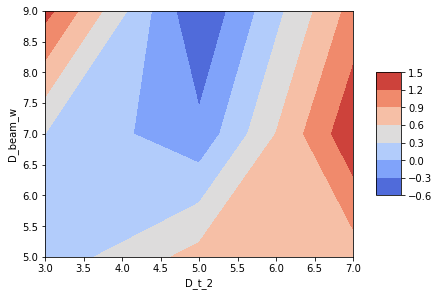

In [ ]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
cont = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('D_t_2')
ax.set_ylabel('D_beam_w')
    
fig.colorbar(cont, shrink=0.5, aspect=5)

plt.show()

# Multiple 2D-graphs

## D_t_1 = 1

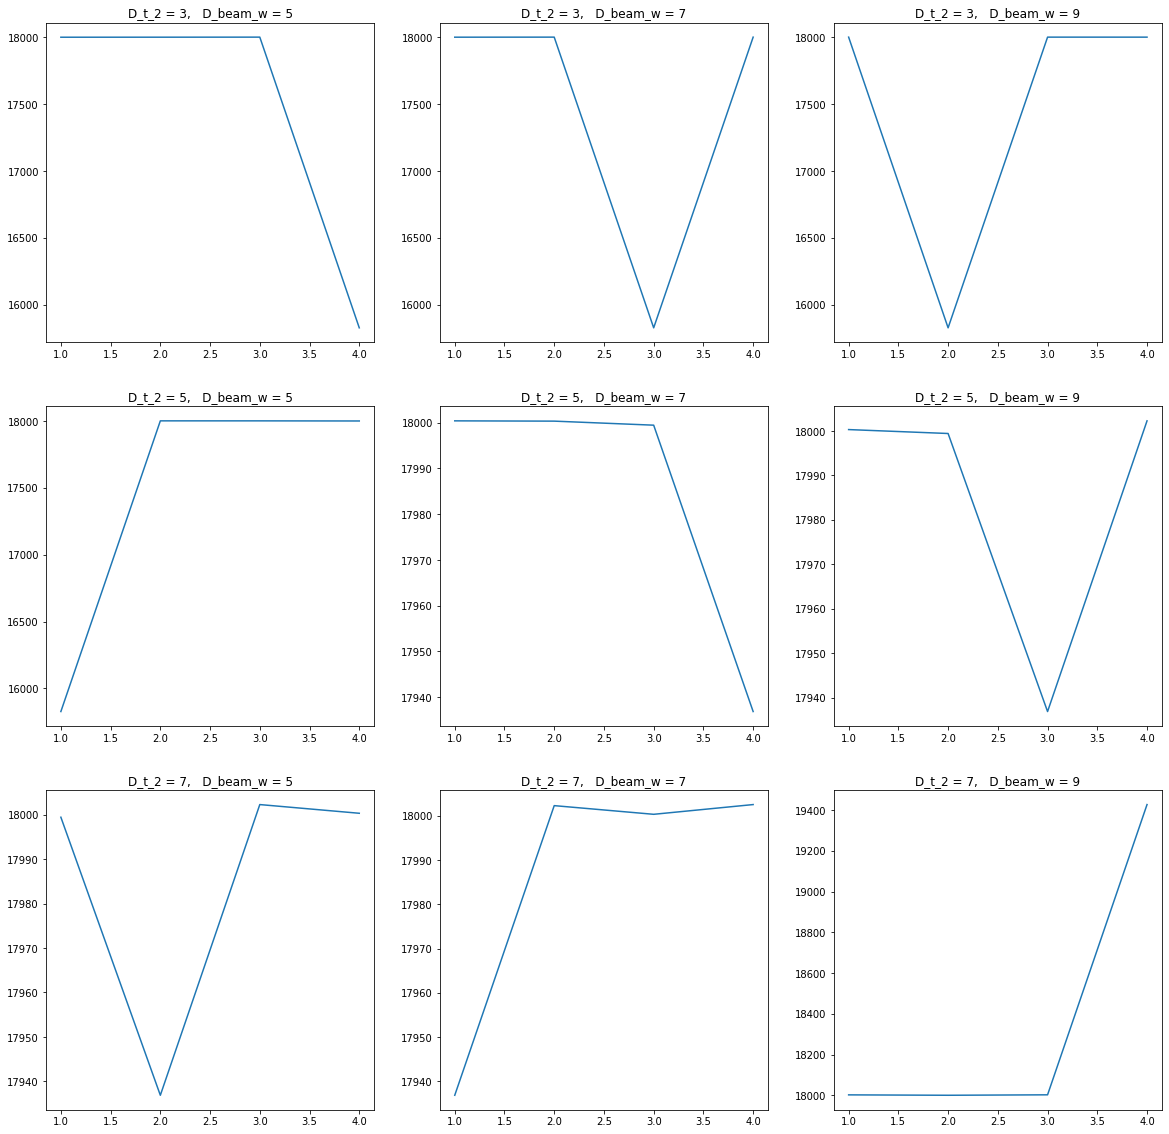

In [22]:
mode_numbers = np.array([1, 2, 3, 4])
fig, ax = plt.subplots(ncols=3, nrows=3)
k = 0
for i in range(0, 3):
    for j in range(0, 3):
        ax[i,j].plot(mode_numbers, df.iloc[k:k+4, 4])
        ax[i,j].set_title(f"D_t_2 = {df.iloc[i*12, 1]},   D_beam_w = {df.iloc[j*4, 2]}")
        k += 1
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

## D_t_1 = 3

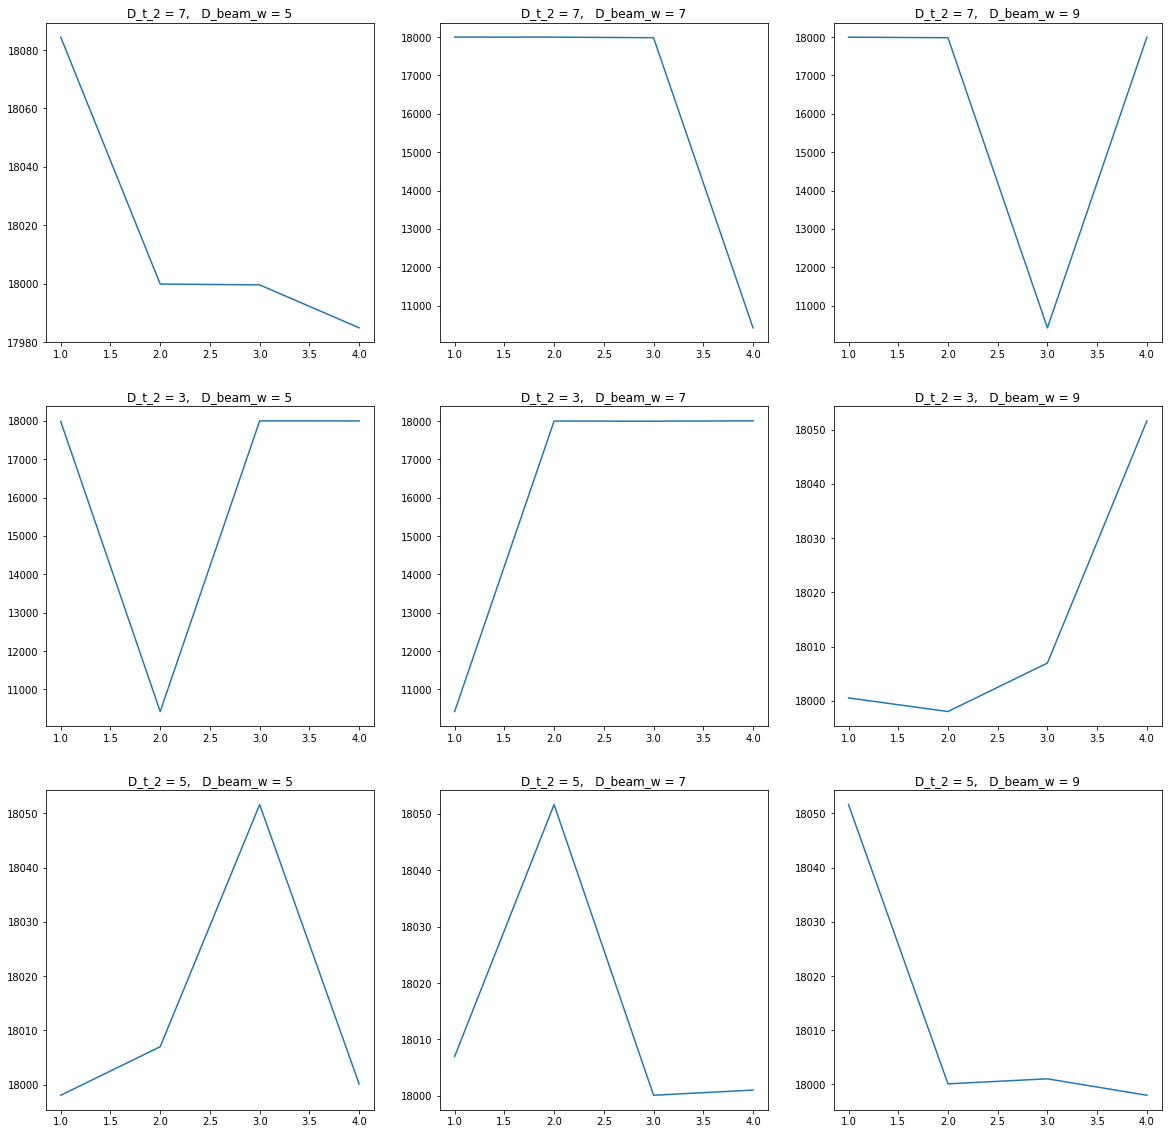

In [23]:
mode_numbers = np.array([1, 2, 3, 4])
fig, ax = plt.subplots(ncols=3, nrows=3)
k = 0
for i in range(0, 3):
    for j in range(0, 3):
        ax[i,j].plot(mode_numbers, df.iloc[27+k:27+k+4, 4])
        ax[i,j].set_title(f"D_t_2 = {df.iloc[27+i*12, 1]},   D_beam_w = {df.iloc[27+j*4, 2]}")
        k += 1
plt.rcParams["figure.figsize"] = (20,20)
plt.show()